In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.special import softmax

In [3]:
watson_df = pd.read_csv('../data/watson_labeled.csv')
watson_labels = ["sad-watson", "joy-watson", "fear-watson", "disgust-watson", "anger-watson"]
watson_df = watson_df[watson_labels]
watson_df = watson_df.rename(columns={"sad-watson":"sadness", "joy-watson":"joy", "fear-watson":"fear", "disgust-watson":"disgust", "anger-watson":"anger"})
watson_df.head()

,sadness,joy,fear,disgust,anger
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.104426,0.509384,0.041365,0.060137,0.139513
3,0.263580,0.087135,0.157997,0.286014,0.279036
4,0.142407,0.025171,0.728310,0.215535,0.172101


In [4]:
twitter_roberta_df = pd.read_csv('../data/twiter_roberta_volunteer_1000.csv', )
twitter_roberta_labels = ['anger', 'joy', 'optimism', 'sadness']
twitter_roberta_df = twitter_roberta_df[twitter_roberta_labels]
twitter_roberta_df.head()

,anger,joy,optimism,sadness
0,0.008924,-0.242645,0.843529,0.546363
1,1.569450,-0.123015,-0.555020,0.703006
2,1.061122,-1.039834,1.878175,-0.721822
3,0.727090,-1.144344,0.905980,0.512724
4,1.236506,-1.607382,-0.365511,1.277178


In [5]:
softmax_df = twitter_roberta_df.apply(softmax, axis=1)
softmax_df.head()

,anger,joy,optimism,sadness
0,0.172619,0.134225,0.397698,0.295458
1,0.580045,0.106766,0.069313,0.243876
2,0.281349,0.034420,0.636924,0.047307
3,0.316772,0.048752,0.378824,0.255652
4,0.434556,0.025291,0.087559,0.452595


In [6]:
t5_emotion = pd.read_csv('../data/t5_emotion_volunteer_1000.csv', index_col=0)
t5_emotion.head()

,anger,fear,joy,love,sadness,surprise,other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
goemotion_bert = pd.read_csv('../data/goemotion_bert_volunteer_1000.csv', index_col=0)
goemotion_bert.head()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998516
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998397
2,0.971056,0.0,0.0,0.0,0.962864,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.98823,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.605382


In [7]:
from numpy.polynomial.polynomial import polyfit

def plot_correlation(label):
    x = watson_df[label].values
    y = softmax_df[label].values
    plot_line(x, y, f'watson api {label}', f'twitter roberta {label}')

def plot_line(x, y, xlabel, ylabel):
    b, m = polyfit(x, y, 1)
    plt.plot(x, y, '.')
    plt.plot(x, b + m * x, '-')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def compare_dfs(df1, df2, name1, name2):
    for label in df1.columns:
        if label in df2.columns:
            plot_line(df1[label].values, df2[label].values, f'{name1} {label}', f'{name2} {label}')

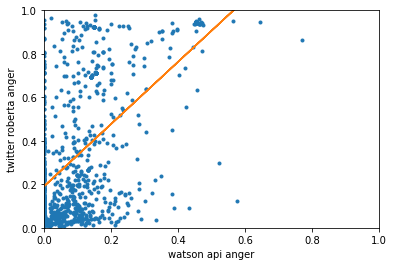

In [8]:
plot_correlation('anger')

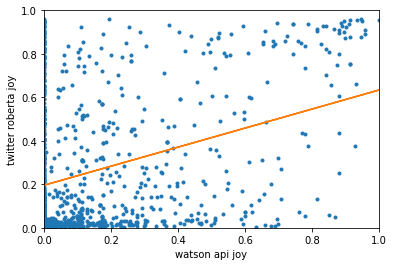

In [9]:
plot_correlation('joy')

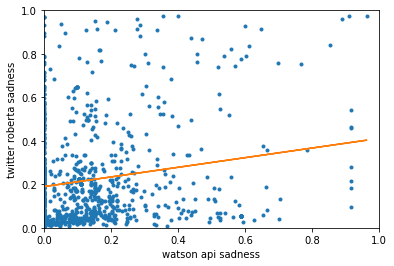

In [10]:
plot_correlation('sadness')

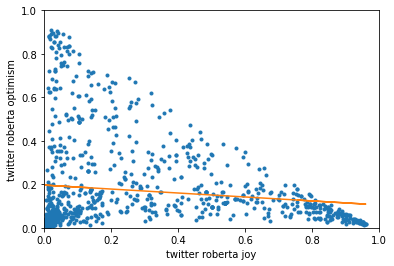

In [11]:
plot_line(softmax_df['joy'].values, softmax_df['optimism'].values, 'twitter roberta joy', 'twitter roberta optimism')

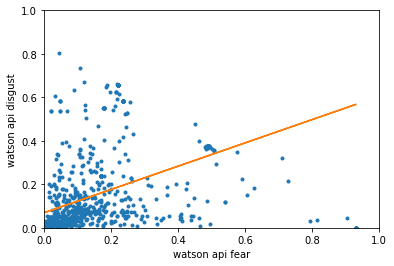

In [12]:
plot_line(watson_df['fear'].values, watson_df['disgust'].values, 'watson api fear', 'watson api disgust')

In [13]:
def plot_hist(df):
    indices = np.argmax(df.values, axis=1)
    a = df.columns.values[indices]
    unique, counts = np.unique(a, return_counts=True)
    plt.bar(unique, counts)

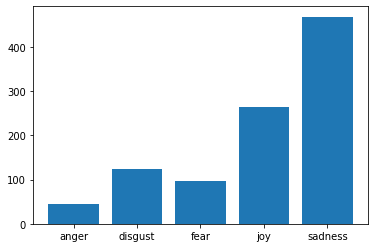

In [14]:
plot_hist(watson_df)

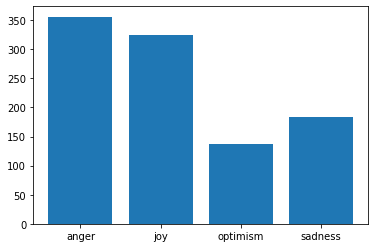

In [15]:
plot_hist(twitter_roberta_df)

In [16]:
s = watson_df.apply(lambda x: np.maximum(0, 1-np.sum(x)), axis=1).rename('other')
watson_df_2 = watson_df.copy()
watson_df_2['other'] = s
watson_df_2.head()

,sadness,joy,fear,disgust,anger,other
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,0.104426,0.509384,0.041365,0.060137,0.139513,0.145175
3,0.263580,0.087135,0.157997,0.286014,0.279036,0.000000
4,0.142407,0.025171,0.728310,0.215535,0.172101,0.000000


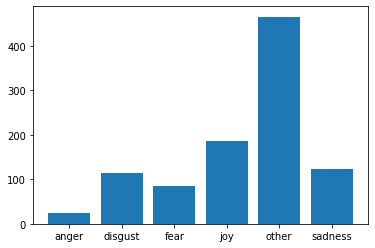

In [17]:
plot_hist(watson_df_2)

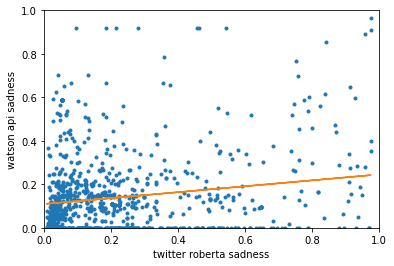

In [18]:
plot_line(softmax_df['sadness'].values, watson_df_2['sadness'].values, 'twitter roberta sadness', 'watson api sadness')

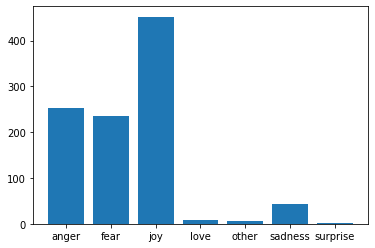

In [21]:
plot_hist(t5_emotion)

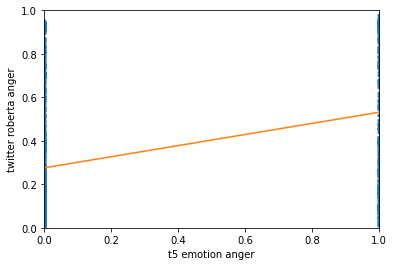

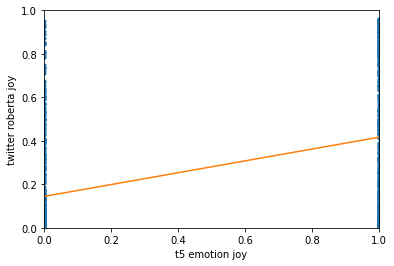

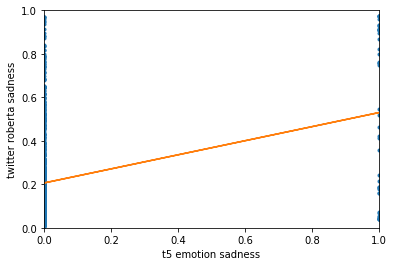

In [19]:
compare_dfs(t5_emotion, softmax_df, 't5 emotion', 'twitter roberta')

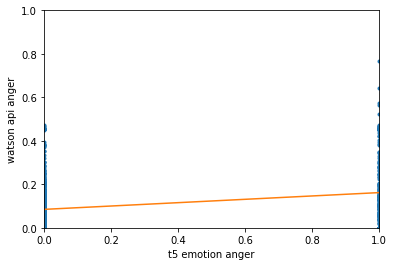

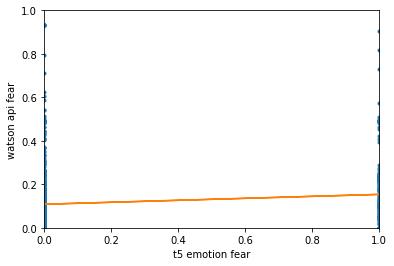

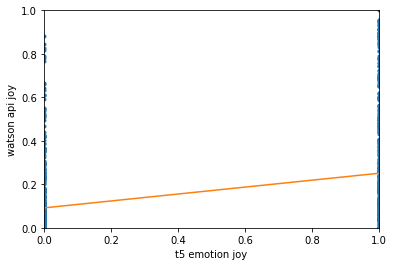

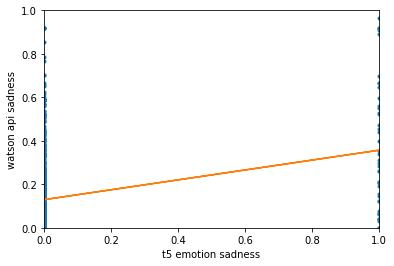

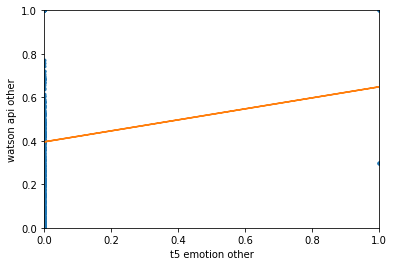

In [20]:
compare_dfs(t5_emotion, watson_df_2, 't5 emotion', 'watson api')

In [29]:
def plot_hist_horizontal(df):
    indices = np.argmax(df.values, axis=1)
    a = df.columns.values[indices]
    unique, counts = np.unique(a, return_counts=True)
    plt.barh(unique, counts)

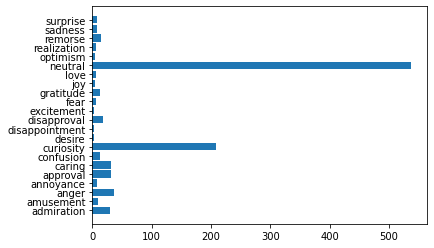

In [30]:
plot_hist_horizontal(goemotion_bert)

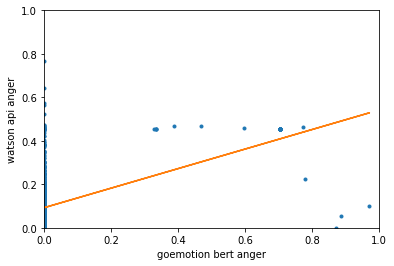

c:\users\julius\anaconda3\envs\cs501\lib\site-packages\numpy\polynomial\polynomial.py:1350: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


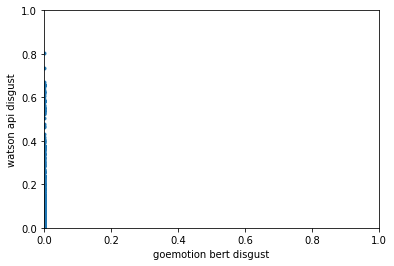

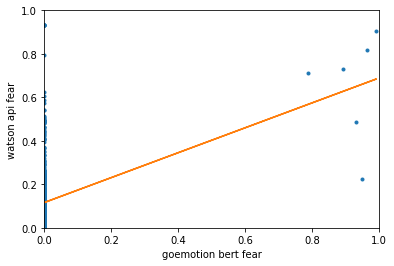

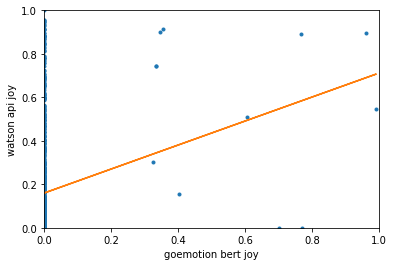

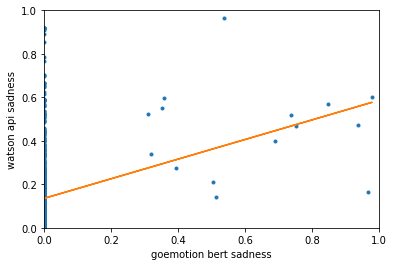

In [23]:
compare_dfs(goemotion_bert, watson_df_2, 'goemotion bert', 'watson api')

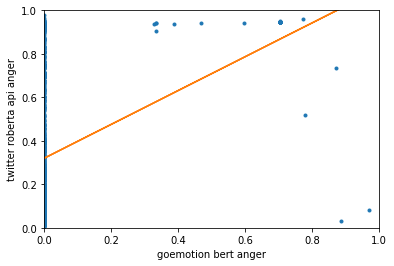

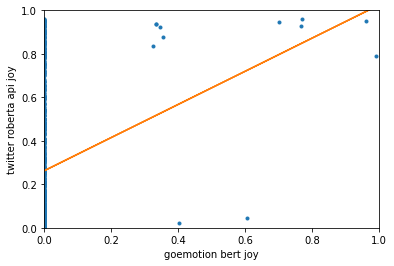

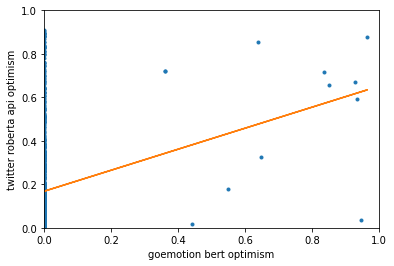

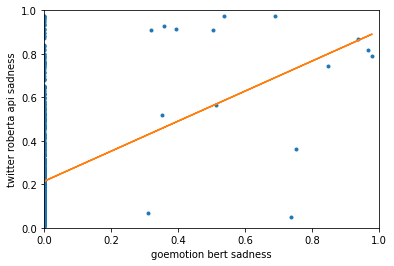

In [24]:
compare_dfs(goemotion_bert, softmax_df, 'goemotion bert', 'twitter roberta api')

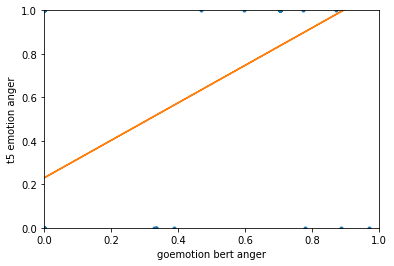

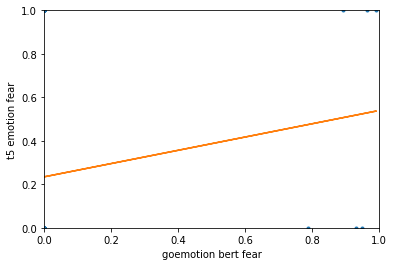

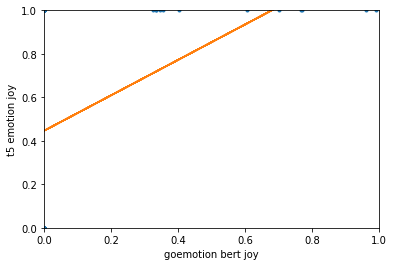

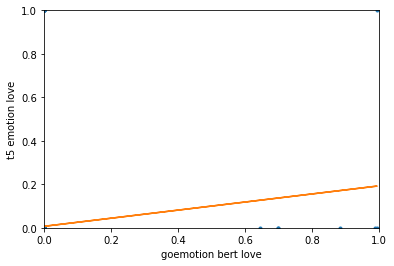

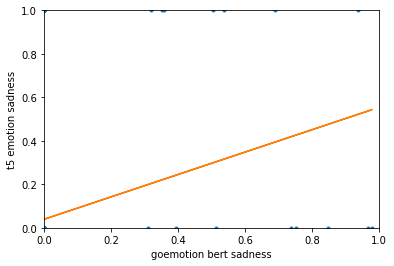

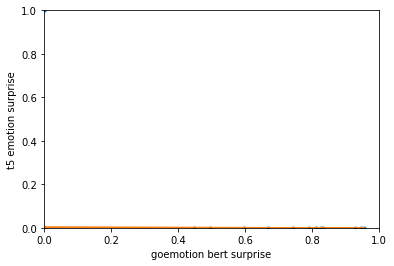

In [25]:
compare_dfs(goemotion_bert, t5_emotion, 'goemotion bert', 't5 emotion')